In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [2]:
#Import Dataset
raw_data = pd.read_csv('daft_ie_v1.csv')

In [3]:
#Dataset Overview
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3967 non-null   int64  
 1   title             3967 non-null   object 
 2   featuredLevel     3967 non-null   object 
 3   publishDate       3967 non-null   object 
 4   price             3967 non-null   int64  
 5   numBedrooms       3967 non-null   int64  
 6   numBathrooms      3967 non-null   int64  
 7   propertyType      3967 non-null   object 
 8   propertySize      3612 non-null   float64
 9   category          3967 non-null   object 
 10  AMV_price         3967 non-null   int64  
 11  sellerId          3967 non-null   float64
 12  seller_name       3967 non-null   object 
 13  seller_branch     3967 non-null   object 
 14  sellerType        3967 non-null   object 
 15  m_totalImages     3967 non-null   float64
 16  m_hasVideo        3967 non-null   bool   


<AxesSubplot:>

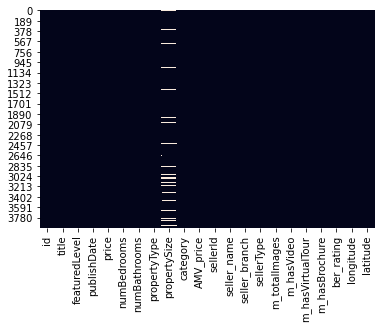

In [4]:
#Check if there is any null value
sns.heatmap(raw_data.isnull(), cbar=False)
#property size have null values

In [5]:
#Dataset Overview
print(raw_data.head())

        id                                              title featuredLevel  \
0  3626025  11 Chestnut Crescent, Bridgemount, Carrigaline...      featured   
1  3675175  58 The Glen, Kilnacourt Woods, Portarlington, ...      featured   
2  3673450        16 Dodderbrook Park, Ballycullen, Dublin 24      featured   
3  3649708      31 Lissanalta Drive, Dooradoyle, Co. Limerick      featured   
4  3643947                5 Columba Terrace, Kells, Co. Meath      featured   

  publishDate   price  numBedrooms  numBathrooms    propertyType  \
0  2022-01-28  290000            3             3  End of Terrace   
1  2022-01-28  225000            3             2          Semi-D   
2  2022-01-27  575000            4             3          Semi-D   
3  2022-01-28  299000            3             3          Semi-D   
4  2022-01-28  120000            3             1         Terrace   

   propertySize category  ...       seller_name              seller_branch  \
0          96.0      Buy  ...       Ro

In [6]:
#Dataset Overview
print(raw_data.describe())
#need to check outliers such as nobedroom, propertysize 1 and 8600

                 id         price  numBedrooms  numBathrooms  propertySize  \
count  3.967000e+03  3.967000e+03  3967.000000   3967.000000   3612.000000   
mean   3.629047e+06  3.416734e+05     3.126292      2.077136    132.673865   
std    2.502479e+05  2.703582e+05     1.230570      1.167772    295.246580   
min    1.092100e+04  2.000000e+04     1.000000      1.000000      1.000000   
25%    3.654066e+06  1.950000e+05     2.000000      1.000000     78.000000   
50%    3.673795e+06  2.750000e+05     3.000000      2.000000    103.000000   
75%    3.685990e+06  3.950000e+05     4.000000      3.000000    137.000000   
max    3.695402e+06  4.500000e+06    23.000000     23.000000   8600.000000   

         AMV_price      sellerId  m_totalImages    longitude     latitude  
count  3967.000000  3.967000e+03    3967.000000  3967.000000  3967.000000  
mean      0.047391  2.163815e+04      18.448954    -7.389964    53.133816  
std       0.212500  2.541506e+05      10.537226     1.865587     0.71

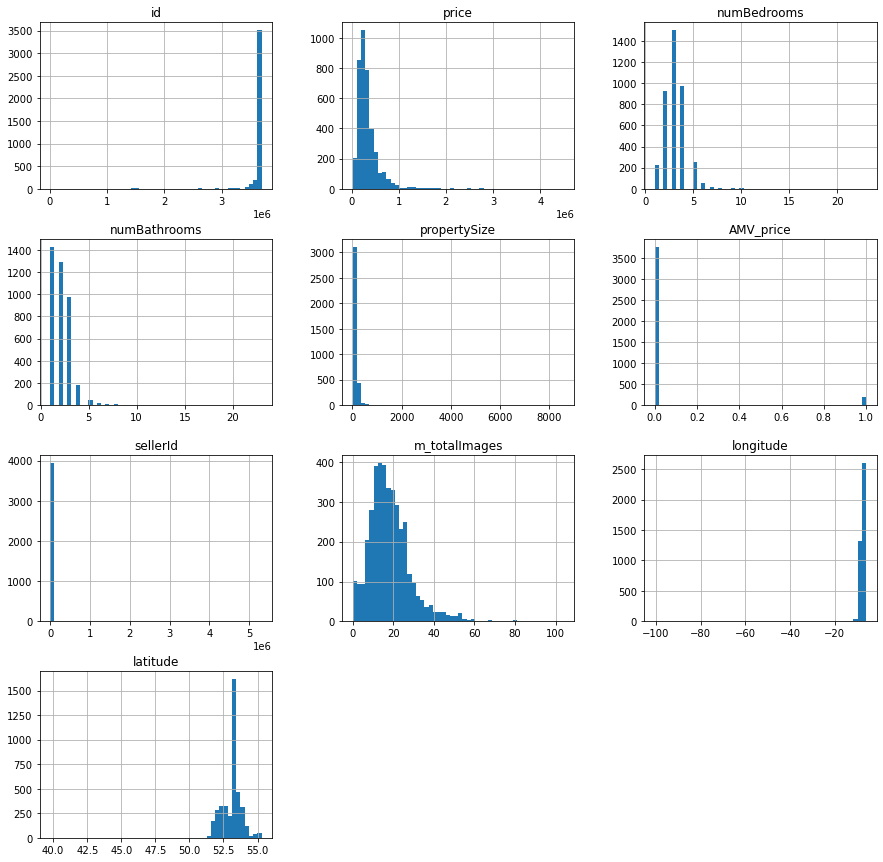

In [7]:
#Dataset Distribution Overview
raw_data.hist(bins=50,figsize=(15,15))
plt.show()
#outliers in longtitude ad latitude
#heavy tail for no. of bedrooms and bathrooms

In [8]:
#find unique values for all categorical data
raw_data_subset = raw_data[['featuredLevel','propertyType','category','ber_rating','m_hasVideo','m_hasVirtualTour','m_hasBrochure','AMV_price']]
for col in raw_data_subset.columns:
    print(raw_data_subset[col].value_counts()) # to print count of every category
#We can see from the data a lot of data needs to be cleaned in BER rating, SI_666,XXX, A1A2

standard    3473
premium      314
featured     180
Name: featuredLevel, dtype: int64
Detached          1079
Semi-D             981
Apartment          718
Terrace            614
End of Terrace     244
Bungalow           196
Townhouse           63
Duplex              50
Site                19
House                2
Studio               1
Name: propertyType, dtype: int64
Buy          3869
New Homes      98
Name: category, dtype: int64
C2        475
C3        462
C1        452
D1        438
D2        349
B3        290
G         242
E1        213
F         187
SI_666    185
E2        172
XXX       169
B2        105
A2        102
A3         97
B1         24
A1          4
A1A2        1
Name: ber_rating, dtype: int64
False    3236
True      731
Name: m_hasVideo, dtype: int64
False    3606
True      361
Name: m_hasVirtualTour, dtype: int64
False    3835
True      132
Name: m_hasBrochure, dtype: int64
0    3779
1     188
Name: AMV_price, dtype: int64


In [9]:
#check correlations between each attribute and property price 
corr_matrix = raw_data.corr()
corr_matrix['price'].sort_values(ascending=False)

price               1.000000
numBathrooms        0.385685
numBedrooms         0.361985
propertySize        0.086300
sellerId            0.020001
m_hasBrochure       0.012194
m_hasVirtualTour   -0.003794
m_totalImages      -0.008185
m_hasVideo         -0.010082
longitude          -0.016931
latitude           -0.017384
id                 -0.081268
AMV_price          -0.138033
Name: price, dtype: float64

In [10]:
#load in county geographic info
county = pd.read_csv('county.csv')
raw_data_merged = pd.merge(raw_data,county, how="inner", on=["id"])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

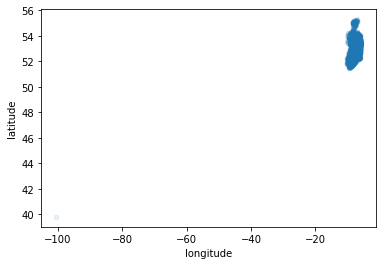

In [11]:
#plot lat/lon
raw_data_merged.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)
#there is outlier in the datatset

In [12]:
#Check the average value of the raw dataset by property Type 
df = raw_data_merged[['propertyType','numBedrooms','numBathrooms','propertySize','price','ber_rating','longitude','latitude','Region']]
df.groupby(["propertyType"]).mean()
#house and detached have higher values than others 

,numBedrooms,numBathrooms,propertySize,price,longitude,latitude
propertyType,,,,,,
Apartment,1.923398,1.527855,79.970282,281654.387187,-7.266028,53.168716
Bungalow,3.285714,1.750000,135.344444,321338.010204,-7.480642,53.058516
Detached,3.870250,2.558851,182.713987,412335.819277,-7.471360,53.108889
Duplex,2.760000,2.420000,99.543478,310053.000000,-7.306076,53.204885
End of Terrace,3.024590,2.020492,143.221739,334661.680328,-7.390618,53.087512
House,6.000000,3.000000,271.500000,625000.000000,-6.459762,53.322000
Semi-D,3.362895,2.247706,124.314480,335989.194699,-7.353824,53.173145
Site,1.000000,1.000000,113.000000,181918.421053,-7.085069,53.186237
Studio,1.000000,1.000000,328.000000,150000.000000,-6.272701,53.287025


In [13]:
#replace null property Size with mean value based on property Type
means = df.groupby(['propertyType'])['propertySize'].mean()
df = df.set_index(['propertyType'])
df['propertySize'] = df['propertySize'].fillna(means)
df = df.reset_index()
df.groupby(["propertyType"]).mean()

,numBedrooms,numBathrooms,propertySize,price,longitude,latitude
propertyType,,,,,,
Apartment,1.923398,1.527855,79.970282,281654.387187,-7.266028,53.168716
Bungalow,3.285714,1.750000,135.344444,321338.010204,-7.480642,53.058516
Detached,3.870250,2.558851,182.713987,412335.819277,-7.471360,53.108889
Duplex,2.760000,2.420000,99.543478,310053.000000,-7.306076,53.204885
End of Terrace,3.024590,2.020492,143.221739,334661.680328,-7.390618,53.087512
House,6.000000,3.000000,271.500000,625000.000000,-6.459762,53.322000
Semi-D,3.362895,2.247706,124.314480,335989.194699,-7.353824,53.173145
Site,1.000000,1.000000,113.000000,181918.421053,-7.085069,53.186237
Studio,1.000000,1.000000,328.000000,150000.000000,-6.272701,53.287025


In [14]:
#Find points/outliers not in Ireland
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=2)
geo_loc = df[["longitude","latitude"]]
nn.fit(geo_loc)
# for each point, the first match is the point itself, the second match is the actual nearest neighbour
distance,indices= nn.kneighbors(geo_loc)

In [15]:
#sort through the "distances" dataset to find values higher than you threshold and delete those entrie
#check the outlier for the index 
dist = pd.DataFrame(distance[:,1])
dist.columns =['distance']
dist = dist.sort_values(by='distance',ascending=False)
print(dist)

       distance
3902  90.872398
2771   0.237813
1793   0.208960
432    0.172814
3887   0.170131
...         ...
438    0.000000
3093   0.000000
1991   0.000000
1981   0.000000
1983   0.000000

[3967 rows x 1 columns]


In [16]:
#drop outlier, reset index
df = df.drop([3902])
df = df.reset_index()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

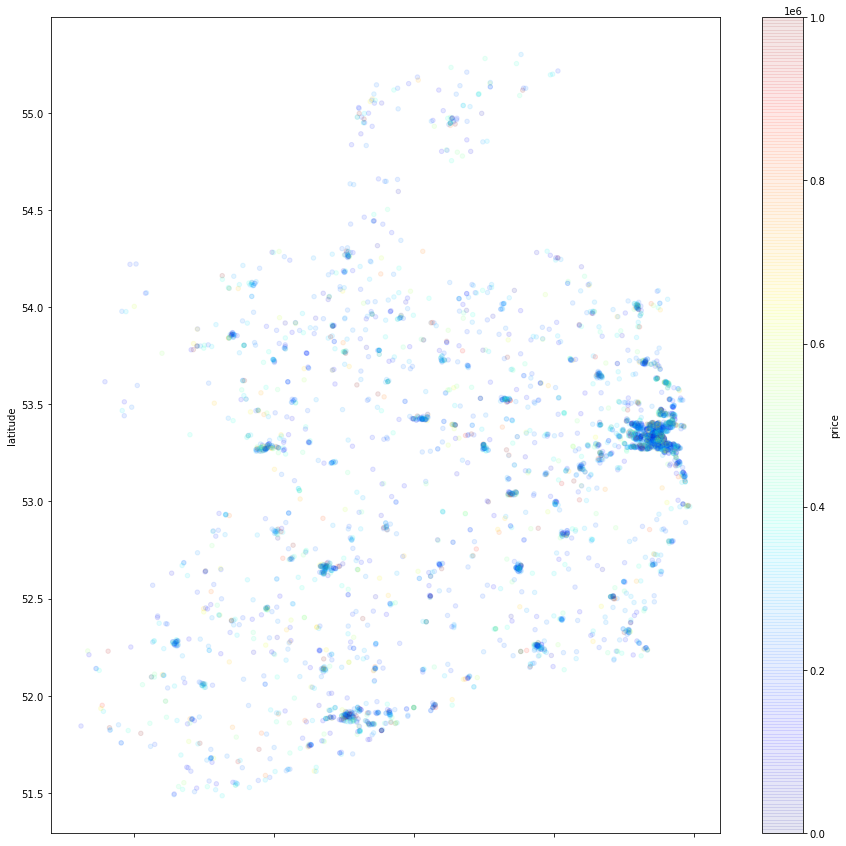

In [17]:
#plot lat/lon 
df.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1,figsize=(15,15),c="price",cmap=plt.get_cmap('jet'),colorbar=True,vmin = 0, vmax =1000000)
#Most of the housing are in dublin

In [18]:
#Check raw data with bedrooms over 10
max_bed = df[df['numBedrooms']>10]
print(max_bed)

      index propertyType  numBedrooms  numBathrooms  propertySize    price  \
113     113     Detached           13            13    557.000000   650000   
394     394     Detached           16             4     67.000000   900000   
404     404     Detached           16            10    648.000000   695000   
3070   3070     Detached           14             9   1208.000000  1600000   
3143   3143     Detached           12            13    641.000000   795000   
3932   3933     Detached           23            23    182.713987  1300000   

     ber_rating  longitude   latitude      Region  
113          A3  -7.500182  53.291586    Midlands  
394          B3  -6.146728  53.295465      Dublin  
404          C1  -6.547100  53.950781    Mid-East  
3070     SI_666  -7.307695  53.033992    Midlands  
3143         C2  -7.119738  52.263717  South-East  
3932         A2  -6.445044  53.400966    Mid-East  


In [19]:
#Check raw data with bedrooms over 10
max_bath = df[df['numBathrooms']>10]
print(max_bath)

      index propertyType  numBedrooms  numBathrooms  propertySize    price  \
113     113     Detached           13            13    557.000000   650000   
353     353     Detached           10            12    182.713987  2000000   
3143   3143     Detached           12            13    641.000000   795000   
3155   3155     Detached            7            11    517.000000  1250000   
3932   3933     Detached           23            23    182.713987  1300000   

     ber_rating  longitude   latitude      Region  
113          A3  -7.500182  53.291586    Midlands  
353          B2  -7.910401  52.381133    Mid-West  
3143         C2  -7.119738  52.263717  South-East  
3155         C3  -8.484469  51.891761  South-West  
3932         A2  -6.445044  53.400966    Mid-East  


In [20]:
#drop index 394,3932 and 353 outlier, reset index
df = df.drop([394])
df = df.drop([3932])
df = df.drop([353])
df = df.reset_index()

In [21]:
#replace invalid BER rating values to UNKNOWN
df['ber_rating'] = df['ber_rating'].str.replace(r'SI_666', 'UNKNOWN', regex=True).astype('str')
df['ber_rating'] = df['ber_rating'].str.replace(r'XXX', 'UNKNOWN', regex=True).astype('str')
df['ber_rating'] = df['ber_rating'].str.replace(r'A1A2', 'A1', regex=True).astype('str')
print(df['ber_rating'].value_counts())

C2         475
C3         462
C1         452
D1         438
UNKNOWN    353
D2         349
B3         289
G          242
E1         213
F          187
E2         172
B2         104
A2         101
A3          97
B1          24
A1           5
Name: ber_rating, dtype: int64


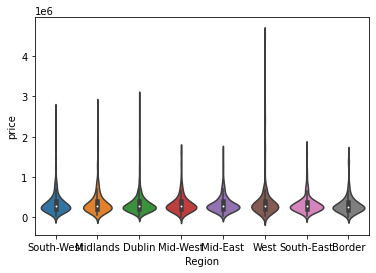

In [22]:
#Plot average house price in each Region
df.groupby('Region', as_index=False)['price'].mean()
p = sns.violinplot(x="Region", y="price", data=df)

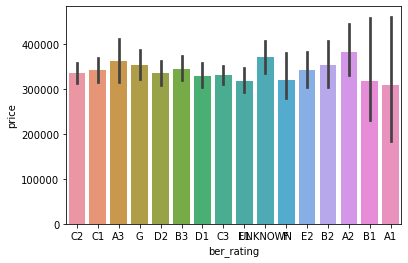

In [23]:
#Plot average house price for each BER_rating
df.groupby('ber_rating', as_index=False)['price'].mean()
p = sns.barplot(x="ber_rating", y="price", data=df)

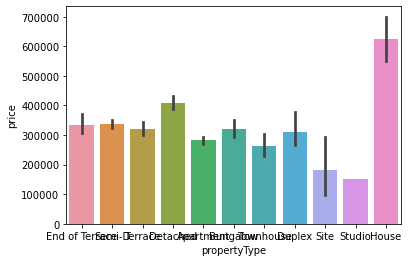

In [24]:
#Plot average house price in each Property Type 
df.groupby('propertyType', as_index=False)['price'].mean()
p = sns.barplot(x="propertyType", y="price", data=df)

# Convert Categorical Attributes to Ordinal Number

In [25]:
df_encoded = df
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
categorical_attribs = ['ber_rating','propertyType','Region']
ct = ColumnTransformer([
    ("categorical",OrdinalEncoder(),categorical_attribs) 
  ])
df_encoded = ct.fit_transform(df_encoded)
cat = pd.DataFrame(df_encoded, columns = ['ber_rating_encoded','propertyType_encoded','Region_encoded'])
df = pd.concat([df, cat], axis=1)

(0.0, 1000000.0)

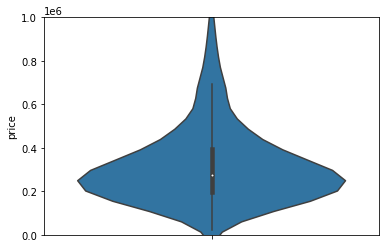

In [26]:
#Prepartion for break prices into different categories, check distribution under 1million
ax = sns.violinplot(y="price", data=df)
plt.ylim(0,1000000)

In [27]:
#Break Property price into different categories
df['price_cat'] = pd.cut(df.price,bins=[0,200000,400000,600000,800000,1000000],labels=[0,1,2,3,4],right=False)

In [28]:
#Label Coding price category, convert it to int
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['price_category'] = LE.fit_transform(df['price_cat'])
df.groupby(['price_category'])['price'].mean()

price_category
0    1.466902e+05
1    2.905094e+05
2    4.814647e+05
3    6.908111e+05
4    8.864487e+05
5    1.591793e+06
Name: price, dtype: float64

In [29]:
#Overview of final dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   level_0               3963 non-null   int64   
 1   index                 3963 non-null   int64   
 2   propertyType          3963 non-null   object  
 3   numBedrooms           3963 non-null   int64   
 4   numBathrooms          3963 non-null   int64   
 5   propertySize          3963 non-null   float64 
 6   price                 3963 non-null   int64   
 7   ber_rating            3963 non-null   object  
 8   longitude             3963 non-null   float64 
 9   latitude              3963 non-null   float64 
 10  Region                3963 non-null   object  
 11  ber_rating_encoded    3963 non-null   float64 
 12  propertyType_encoded  3963 non-null   float64 
 13  Region_encoded        3963 non-null   float64 
 14  price_cat             3871 non-null   category
 15  pric

# Test train split

In [30]:
#Create Stratified Test Set, make sure test and train dataset follows the geogprahic distribution
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(df,df["Region"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [31]:
strat_train_set["Region"].value_counts()/len(strat_train_set)

Dublin        0.321136
South-West    0.137224
Mid-East      0.121451
West          0.105363
South-East    0.088644
Mid-West      0.078864
Midlands      0.076972
Border        0.070347
Name: Region, dtype: float64

In [32]:
strat_test_set["Region"].value_counts()/len(strat_test_set)

Dublin        0.321564
South-West    0.137453
Mid-East      0.121059
West          0.105927
South-East    0.088272
Mid-West      0.079445
Midlands      0.076923
Border        0.069357
Name: Region, dtype: float64

In [33]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3170 entries, 3025 to 1210
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   level_0               3170 non-null   int64   
 1   index                 3170 non-null   int64   
 2   propertyType          3170 non-null   object  
 3   numBedrooms           3170 non-null   int64   
 4   numBathrooms          3170 non-null   int64   
 5   propertySize          3170 non-null   float64 
 6   price                 3170 non-null   int64   
 7   ber_rating            3170 non-null   object  
 8   longitude             3170 non-null   float64 
 9   latitude              3170 non-null   float64 
 10  Region                3170 non-null   object  
 11  ber_rating_encoded    3170 non-null   float64 
 12  propertyType_encoded  3170 non-null   float64 
 13  Region_encoded        3170 non-null   float64 
 14  price_cat             3096 non-null   category
 15  p

In [34]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793 entries, 1165 to 2030
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   level_0               793 non-null    int64   
 1   index                 793 non-null    int64   
 2   propertyType          793 non-null    object  
 3   numBedrooms           793 non-null    int64   
 4   numBathrooms          793 non-null    int64   
 5   propertySize          793 non-null    float64 
 6   price                 793 non-null    int64   
 7   ber_rating            793 non-null    object  
 8   longitude             793 non-null    float64 
 9   latitude              793 non-null    float64 
 10  Region                793 non-null    object  
 11  ber_rating_encoded    793 non-null    float64 
 12  propertyType_encoded  793 non-null    float64 
 13  Region_encoded        793 non-null    float64 
 14  price_cat             775 non-null    category
 15  pr

# Train a Decision Tree Model

In [35]:
#Define function to split features and label
def split_dataset(df):
    X_columns = ['propertyType_encoded','numBedrooms','numBathrooms','propertySize','ber_rating_encoded','Region_encoded']
    #'propertyType_encoded','numBedrooms','numBathrooms','propertySize','ber_rating_encoded','Region_encoded'
    y_columns = ['price_category']
    X = pd.DataFrame(df, columns=X_columns)
    y = pd.DataFrame(df, columns=y_columns)
    return X,y 

In [36]:
X_train,y_train = split_dataset(strat_train_set)

In [37]:
X_train

,propertyType_encoded,numBedrooms,numBathrooms,propertySize,ber_rating_encoded,Region_encoded
3025,9.0,4,2,137.000000,5.0,2.0
2658,0.0,2,1,48.000000,6.0,1.0
3303,2.0,4,3,118.000000,11.0,3.0
252,1.0,3,1,135.344444,2.0,5.0
2874,0.0,1,1,68.000000,8.0,2.0
...,...,...,...,...,...,...
3960,9.0,3,1,118.992895,1.0,2.0
1976,7.0,1,1,89.000000,6.0,6.0
2726,0.0,2,2,82.000000,7.0,4.0
3022,6.0,3,1,84.000000,14.0,3.0


In [38]:
y_train

,price_category
3025,1
2658,1
3303,1
252,0
2874,1
...,...
3960,1
1976,0
2726,2
3022,1


In [39]:
X_test,y_test = split_dataset(strat_test_set)

In [40]:
X_test

,propertyType_encoded,numBedrooms,numBathrooms,propertySize,ber_rating_encoded,Region_encoded
1165,9.0,3,1,118.992895,8.0,0.0
2964,2.0,2,1,101.000000,8.0,6.0
3660,6.0,3,1,82.000000,15.0,7.0
3468,0.0,2,1,56.000000,9.0,1.0
3873,1.0,3,1,107.000000,6.0,1.0
...,...,...,...,...,...,...
3024,1.0,4,1,158.000000,8.0,6.0
494,9.0,2,1,118.992895,13.0,0.0
1698,6.0,3,2,90.000000,9.0,1.0
74,2.0,5,3,205.000000,6.0,3.0


In [41]:
y_test

,price_category
1165,1
2964,0
3660,0
3468,1
3873,1
...,...
3024,1
494,1
1698,0
74,5


In [42]:
from sklearn.tree import DecisionTreeClassifier
X = X_train
y = y_train
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X,y)

DecisionTreeClassifier()

In [43]:
#predict labels based on the model 
y_pred= tree_clf.predict(X_test)

In [44]:
#calculate accuracy score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("RMSE:",rmse)
print("Accuracy:",accuracy_score(y_test, y_pred))

RMSE: 1.347081287434379
Accuracy: 0.4010088272383354


# Optimizing Decision Tree Performance

In [45]:
#Optimizing Decision Tree Performance by GridSearchCV
from sklearn import tree
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(2,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=-1)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.5170347003154574 {'max_depth': 3}


In [46]:
from sklearn.metrics import mean_squared_error
y_pred_opt = clf.predict(X_test)
mse_opt = mean_squared_error(y_test,y_pred_opt)
rmse_opt = np.sqrt(mse_opt)
print("RMSE_opt:",rmse_opt)
print("Accuracy_opt:",accuracy_score(y_test, y_pred_opt))

RMSE_opt: 1.1435437497937313
Accuracy_opt: 0.519546027742749


# Predict using User-Defined Input

In [47]:
#my range
#'propertyType_encoded','numBedrooms','numBathrooms','propertySize','ber_rating_encoded','Region_encoded']
X_user = {'propertyType_encodeds': 5,
                      'numBedrooms': 3,
                       'numBathrooms':3,
                      'propertySize': 200,
                      'ber_rating_encoded': 1,
                      'Region_encoded':1}
X_user = pd.DataFrame([X_user],columns=X_user.keys())
print (X_user)

   propertyType_encodeds  numBedrooms  numBathrooms  propertySize  \
0                      5            3             3           200   

   ber_rating_encoded  Region_encoded  
0                   1               1  


In [48]:
#using the tree to predict my price range 
y_user = clf.predict(X_user)

In [49]:
print(y_user)
#the predicted housing price is between 200k-400k

[1]
